<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="tu-dresden-blue.png" alt="drawing" width="200"/>

Professur für Angewandte Umweltsystemanalyse an der TU Dresden <br/>
Prof. Dr.-Ing. habil. Olaf Kolditz <br/>
***Hydroinformatik II (HyBHW-2-01)*** <br/>
*[Lehre-Webseite](https://www.ufz.de/index.php?de=40425)*

***Exercise EX10 - Open channel flow*** <br/>

In [1]:
#include <iostream>
using namespace std;
cout << "Hello Jupyter!" << endl;
std::cout << "This is Hydroinformatics II 2021: EX10 (open channel flow) on Jupter" << std::endl;

Hello Jupyter!
This is Hydroinformatics II 2021: EX10 (open channel flow) on Jupter


In [2]:
#include <vector>
#include <iostream>
#include <fstream>
using namespace std;
int n=11;
vector<double> u_new, u_old;
ofstream out_file;
out_file.open("out.txt");
ofstream out_python;
out_python.open("out.csv");
//out_file.precision(3);
u_new.resize(n);
u_old.resize(n);
double x[11];
for(int i=0;i<n;i++)
  x[i] = -100. + i*10.;
double bottom_elevation[11];
for(int i=0;i<n;i++)
  bottom_elevation[i] = 0.04 - i*0.004;
for(int i=0;i<n;i++)
{
  u_old[i] = 0.25;
}
// Randbedingungen
u_old[10] = 0.1; // Wasserstand flußabwärts [m]
u_new[10] = 0.1; // Wasserstand flußabwärts [m]
cout << u_old[10];

0.1

In [3]:
// Parameter (konstant)
double discharge = 0.05; // Volumenfließrate [m3/s]
double gravity = 9.81; // [m/s2]
double friction_law_exponent = 0.5; // Chezy, Manning-Strickler [-]
double error_tolerance = 1e-3; // [m]
double bed_slope = 0.0004; // [m/m]
double bottom_width = 1.; // [m]
double m = 1.; //
double friction_coefficient = 10.; //
// Parameter (variabel)
double wetted_cross_section[11];
double water_level_elevation[11];
double flow_velocity[11];
double Froude_number[11];
double wetted_perimeter[11];
double hydraulic_radius[11];
double friction_slope[11];

In [4]:
for(int i=0;i<n;i++)
{
  wetted_perimeter[i] = bottom_width + 2.*sqrt(1.+m*m)*u_old[i];
  wetted_cross_section[i] = (bottom_width + m*u_old[i])*u_old[i];
  hydraulic_radius[i] = wetted_cross_section[i] / wetted_perimeter[i];
  water_level_elevation[i] = bottom_elevation[i] + u_old[i];
  flow_velocity[i] = discharge/wetted_cross_section[i];
  Froude_number[i] = flow_velocity[i]/(sqrt(gravity*wetted_cross_section[i]\
                   /sqrt(bottom_width*bottom_width+4.*m*wetted_cross_section[i])));
  friction_slope[i] = pow(flow_velocity[i]/(friction_coefficient*pow(hydraulic_radius[i],friction_law_exponent)),2);
}
// Berechnungsgrößen
double N,N1,N2,N3,D,D1,D2,D21,D22;
double error;
for(int i=0;i<n-1;i++)
{
  N1 = pow(discharge,2)/pow(wetted_cross_section[i+1],2) + gravity*u_old[i+1];
  N2 = pow(discharge,2)/pow(wetted_cross_section[i],2) + gravity*u_old[i];
  N3 = gravity*(bed_slope - (friction_slope[i+1]+friction_slope[i])/2.)*(x[i+1]-x[i]);
  N = N1 - N2 - N3;
  D1 = pow(discharge,2)/pow(wetted_cross_section[i],3) * (bottom_width+2.*m*u_old[i]) - gravity;
  D21 = friction_law_exponent*2.*(sqrt(1+m*m))/wetted_perimeter[i];
  D22 = (1.+friction_law_exponent)/wetted_cross_section[i] * (bottom_width+2.*m*u_old[i]);
  D2 = gravity*friction_slope[i]*(D21-D22)*(x[i+1]-x[i]);
  D = D1 + D2;
  u_new[i] = u_old[i] - N/D;
}
//calc Newton error
for(int i=0;i<n-1;i++)
{
  error += u_old[i] -u_new[i];
}
error = sqrt(error*error);
cout << "Newton error: " << error;
//save Newton step
for(int i=0;i<n-1;i++)
{
  u_old[i] = u_new[i];
}
// Berechnung (1. Iteration des Newton-Verfahrens)
// Ausgabe der Ergebnisse
// File 
out_file << "Water depth (new):\t";
for(int i=0;i<n;i++)
{
  out_file << "\t" << u_new[i] << " ";
}
out_file << endl;
// für Python plot
for(int i=0;i<n;i++)
{
  out_python << x[i] << "," << u_new[i] << endl;
}

Newton error: 0.0759657

In [5]:
for(int i=0;i<n;i++)
{
  wetted_perimeter[i] = bottom_width + 2.*sqrt(1.+m*m)*u_old[i];
  wetted_cross_section[i] = (bottom_width + m*u_old[i])*u_old[i];
  hydraulic_radius[i] = wetted_cross_section[i] / wetted_perimeter[i];
  water_level_elevation[i] = bottom_elevation[i] + u_old[i];
  flow_velocity[i] = discharge/wetted_cross_section[i];
  Froude_number[i] = flow_velocity[i]/(sqrt(gravity*wetted_cross_section[i]\
                   /sqrt(bottom_width*bottom_width+4.*m*wetted_cross_section[i])));
  friction_slope[i] = pow(flow_velocity[i]/(friction_coefficient*pow(hydraulic_radius[i],friction_law_exponent)),2);
}
// Berechnungsgrößen
double N,N1,N2,N3,D,D1,D2,D21,D22;
for(int i=0;i<n-1;i++)
{
  N1 = pow(discharge,2)/pow(wetted_cross_section[i+1],2) + gravity*u_old[i+1];
  N2 = pow(discharge,2)/pow(wetted_cross_section[i],2) + gravity*u_old[i];
  N3 = gravity*(bed_slope - (friction_slope[i+1]+friction_slope[i])/2.)*(x[i+1]-x[i]);
  N = N1 - N2 - N3;
  D1 = pow(discharge,2)/pow(wetted_cross_section[i],3) * (bottom_width+2.*m*u_old[i]) - gravity;
  D21 = friction_law_exponent*2.*(sqrt(1+m*m))/wetted_perimeter[i];
  D22 = (1.+friction_law_exponent)/wetted_cross_section[i] * (bottom_width+2.*m*u_old[i]);
  D2 = gravity*friction_slope[i]*(D21-D22)*(x[i+1]-x[i]);
  D = D1 + D2;
  u_new[i] = u_old[i] - N/D;
}
//calc Newton error
for(int i=0;i<n-1;i++)
{
  error += u_old[i] -u_new[i];
}
error = sqrt(error*error);
cout << "Newton error: " << error;
//save Newton step
for(int i=0;i<n-1;i++)
{
  u_old[i] = u_new[i];
}
// Berechnung (2. Iteration des Newton-Verfahrens)
// Ausgabe der Ergebnisse
// File 
out_file << "Water depth (new):\t";
for(int i=0;i<n;i++)
{
  out_file << "\t" << u_new[i] << " ";
}
out_file << endl;
// für Python plot
for(int i=0;i<n;i++)
{
  out_python << x[i] << "," << u_new[i] << endl;
}

Newton error: 0.0186149

In [6]:
out_file.close();
out_python.close();

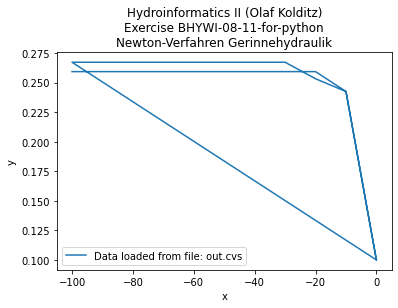

In [1]:
import matplotlib.pyplot as plt
import csv
x = []
y = []
with open('out.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
plt.plot(x,y, label='Data loaded from file: out.cvs')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hydroinformatics II (Olaf Kolditz)\nExercise BHYWI-08-11-for-python\nNewton-Verfahren Gerinnehydraulik')
plt.legend()
plt.savefig("test1.png")
plt.show()